In [1]:
import os
import sys
sys.path.append("..")
import phage_init

In [2]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std.p"), "rb" ) )

In [3]:
di_train     = train_X_total[:,0:400]
tri_train    = train_X_total[:,400:8400]
di_sc_train  = train_X_total[:,8400:8449] 
tri_sc_train = train_X_total[:,8449:8792]
tt_train     = train_X_total[:,8792:]

In [4]:
di_test     = test_X_total[:,0:400]
tri_test    = test_X_total[:,400:8400]
di_sc_test  = test_X_total[:,8400:8449] 
tri_sc_test = test_X_total[:,8449:8792]
tt_test     = test_X_total[:,8792:]

In [5]:
mean_di     = mean_total[0:400]
mean_tri    = mean_total[400:8400]
mean_di_sc  = mean_total[8400:8449] 
mean_tri_sc = mean_total[8449:8792]
mean_tt     = mean_total[8792:]

In [6]:
std_di     = std_total[0:400]
std_tri    = std_total[400:8400]
std_di_sc  = std_total[8400:8449] 
std_tri_sc = std_total[8449:8792]
std_tt     = std_total[8792:]

In [7]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [8]:

#train_X =numpy.concatenate((tri_train),axis=1)
#test_X  =numpy.concatenate((tri_test),axis=1)
train_X=di_sc_train
test_X=di_sc_test
model_name='di_sc.h5'
print(train_X.shape)
print(test_X.shape)

(25000, 49)
(675, 49)


In [9]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5353539738421420193
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9371648
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7465101583424664725
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0"
]


In [10]:
print(train_X.shape[1])
f_num=train_X.shape[1]


49


In [11]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 49)                2450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 49)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               10000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [12]:
model.fit(train_X, train_Y, epochs=100,verbose=1, batch_size=200)

Epoch 1/100
25000/25000 [==============================] - 1s 44us/step - loss: 1.8451 - acc: 0.3630
Epoch 2/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.4542 - acc: 0.5133
Epoch 3/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.3422 - acc: 0.5503
Epoch 4/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.2792 - acc: 0.5751
Epoch 5/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.2319 - acc: 0.5878
Epoch 6/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.1983 - acc: 0.5990
Epoch 7/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.1668 - acc: 0.6084
Epoch 8/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.1500 - acc: 0.6164
Epoch 9/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.1317 - acc: 0.6175
Epoch 10/100
25000/25000 [==============================] - 0s 17us/step - loss: 1.1080 - a

25000/25000 [==============================] - 0s 18us/step - loss: 0.8323 - acc: 0.7084
Epoch 82/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8343 - acc: 0.7052
Epoch 83/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8363 - acc: 0.7068
Epoch 84/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8403 - acc: 0.7054
Epoch 85/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8289 - acc: 0.7074
Epoch 86/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8325 - acc: 0.7096
Epoch 87/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8362 - acc: 0.7061
Epoch 88/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8220 - acc: 0.7144
Epoch 89/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8293 - acc: 0.7086
Epoch 90/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.8278 - acc: 

In [13]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

675/675 [==============================] - 0s 111us/step
Accuracy: 71.56%


In [14]:
#you can save the as a file so you dont have to train it every time
model.save( os.path.join(phage_init.model_dir,model_name))

In [15]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.68      0.81      0.74        93
     Minor capsid       0.77      0.63      0.69        52
        Baseplate       0.74      0.83      0.78       103
       Major tail       0.89      0.63      0.74        54
       Minor tail       0.85      0.78      0.81        36
           Portal       0.70      0.75      0.72        73
       Tail fiber       0.53      0.68      0.59        87
       Tail shaft       0.69      0.56      0.62        48
           Collar       0.54      0.27      0.36        49
Head-Tail joining       0.91      0.93      0.92        80

      avg / total       0.72      0.72      0.71       675



In [16]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({2: 103, 0: 93, 6: 87, 9: 80, 5: 73, 3: 54, 1: 52, 8: 49, 7: 48, 4: 36})
[93, 52, 103, 54, 36, 73, 87, 48, 49, 80]



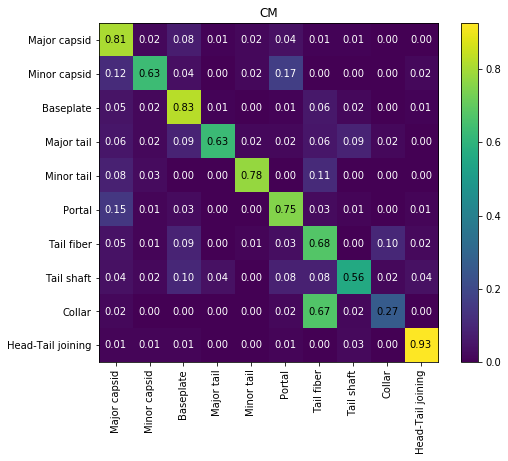

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")
plt.show()

In [19]:
print(numpy.where(~train_X.any(axis=0))[0])

[]


In [20]:
numpy.set_printoptions(threshold=numpy.nan)
print(std_total)

[8.32997820e-03 1.37449475e-03 4.99190984e-03 5.47386805e-03
 3.78220565e-03 7.07038847e-03 2.31475352e-03 4.53206128e-03
 4.57056446e-03 5.97101189e-03 2.58883879e-03 4.06275897e-03
 4.26517347e-03 4.28359267e-03 4.60686206e-03 5.54499637e-03
 6.04377591e-03 5.54704697e-03 2.28783510e-03 3.16883031e-03
 1.47330219e-03 5.99747990e-04 1.41224622e-03 1.48945399e-03
 1.07972006e-03 1.59141763e-03 9.41334404e-04 1.27900314e-03
 1.53810658e-03 1.47268982e-03 1.02650841e-03 1.17268710e-03
 1.18426283e-03 1.00552475e-03 1.76979644e-03 1.50122060e-03
 1.62129945e-03 1.63861386e-03 1.08072021e-03 1.16604740e-03
 5.09498643e-03 1.24172749e-03 4.31220611e-03 4.35011742e-03
 3.32721118e-03 5.17398977e-03 1.86171589e-03 4.30356185e-03
 4.05045915e-03 4.36138090e-03 2.43888703e-03 3.30863231e-03
 3.77163988e-03 2.68897563e-03 3.44011920e-03 4.03796001e-03
 4.16326061e-03 4.25548306e-03 1.99159086e-03 3.20562456e-03
 5.08172742e-03 1.99264364e-03 3.96476635e-03 4.51477528e-03
 3.17912660e-03 4.174658